In [ ]:
import os
import time
import shutil
import sys
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist,cifar10
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from scipy.linalg import sqrtm
from skimage.transform import resize
import matplotlib.pyplot as plt
import keras.backend as K
import warnings
warnings.filterwarnings('ignore')

In [ ]:
INCEPTION_SHAPE=(299,299,3)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

inception = InceptionV3(include_top=False, pooling='avg', input_shape=INCEPTION_SHAPE)

def scale_images(images, new_shape):
    """
    Scales images into new shape by interpolation since inception model requires that
    :param images: List of images
    :param new_shape: The transformed shape
    :return: Transformed images
    """

    images_list = list()

    for image in images:
        new_image = resize(image, new_shape)
        images_list.append(new_image)

    return np.asarray(images_list)


def calculate_fid(model, images1, images2):
    act1 = model.predict(images1)
    act2 = model.predict(images2)

    mu1, sigma1 = act1.mean(axis=0), np.cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), np.cov(act2, rowvar=False)

    ssdiff = np.sum((mu1 - mu2) ** 2.0)

    covmean = sqrtm(sigma1.dot(sigma2))

    if np.iscomplexobj(covmean):
        covmean = covmean.real

    # Equation for FID score calculation
    fid = ssdiff + np.trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid


"""def calculate_is(images, n_split=10, eps=1E-16):
 # load inception v3 model
    model = inception
    # convert from uint8 to float32
    processed = images.astype('float32')
    # pre-process raw images for inception v3 model
    processed = preprocess_input(processed)
    # predict class probabilities for images
    yhat = model.predict(processed)
    # enumerate splits of images/predictions
    scores = list()
    n_part = np.floor(images.shape[0] / n_split)
    for i in range(n_split):
    # retrieve p(y|x)
        ix_start, ix_end = int(i * n_part), int(i * n_part + n_part)
        p_yx = yhat[ix_start:ix_end]
        # calculate p(y)
        p_y = np.expand_dims(p_yx.mean(axis=0), 0)
        # calculate KL divergence using log probabilities
        kl_d = p_yx * (np.log(p_yx + eps) - np.log(p_y + eps))
        # sum over classes
        sum_kl_d = kl_d.sum(axis=1)
        # average over images
        avg_kl_d = np.mean(sum_kl_d)
        # undo the log
        is_score = np.exp(avg_kl_d)
        # store
        scores.append(is_score)
        # average across images
        is_avg, is_std = np.mean(scores), np.std(scores)
    return is_avg, is_std"""

1 Physical GPUs, 1 Logical GPU


"def calculate_is(images, n_split=10, eps=1E-16):\n # load inception v3 model\n    model = inception\n    # convert from uint8 to float32\n    processed = images.astype('float32')\n    # pre-process raw images for inception v3 model\n    processed = preprocess_input(processed)\n    # predict class probabilities for images\n    yhat = model.predict(processed)\n    # enumerate splits of images/predictions\n    scores = list()\n    n_part = np.floor(images.shape[0] / n_split)\n    for i in range(n_split):\n    # retrieve p(y|x)\n        ix_start, ix_end = int(i * n_part), int(i * n_part + n_part)\n        p_yx = yhat[ix_start:ix_end]\n        # calculate p(y)\n        p_y = np.expand_dims(p_yx.mean(axis=0), 0)\n        # calculate KL divergence using log probabilities\n        kl_d = p_yx * (np.log(p_yx + eps) - np.log(p_y + eps))\n        # sum over classes\n        sum_kl_d = kl_d.sum(axis=1)\n        # average over images\n        avg_kl_d = np.mean(sum_kl_d)\n        # undo the log\n 

In [ ]:
def generate_latent_samples(n_samples, sample_size):  
    """
    Creates latent samples to be fed into the generator
    :param n_samples: Number of samples to be generated
    :param sample_size: Dimesion on each sample
    :return: Latent samples of given size
    """
    return np.random.normal(loc=0, scale=1, size=(n_samples, sample_size))

In [ ]:
(_,_),(X_test,_)=mnist.load_data()
gan=keras.models.load_model("/content/drive/MyDrive/DLPROJE/model/gen")
GAN_images=gan.predict(generate_latent_samples(1000, 100))

32/32 [==============================] - 0s 3ms/step


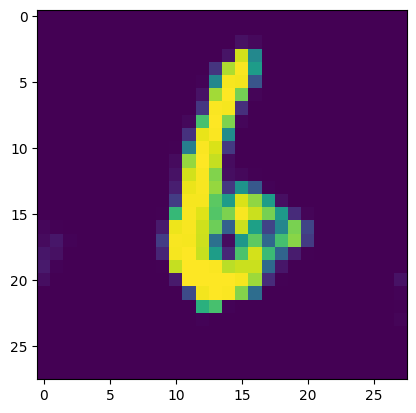

In [ ]:
plt.imshow(GAN_images[1])

In [ ]:
new_GAN_imgs=scale_images(GAN_images,INCEPTION_SHAPE)
X_test_batch = X_test[np.random.choice(len(X_test), 1000, replace=True), :]
X_test_batch = scale_images(X_test_batch,INCEPTION_SHAPE)
FID = calculate_fid(inception, X_test_batch, new_GAN_imgs)
print("FID SCORE: ",format(FID))

32/32 [==============================] - 3s 102ms/step
FID SCORE:  55.063871509047395


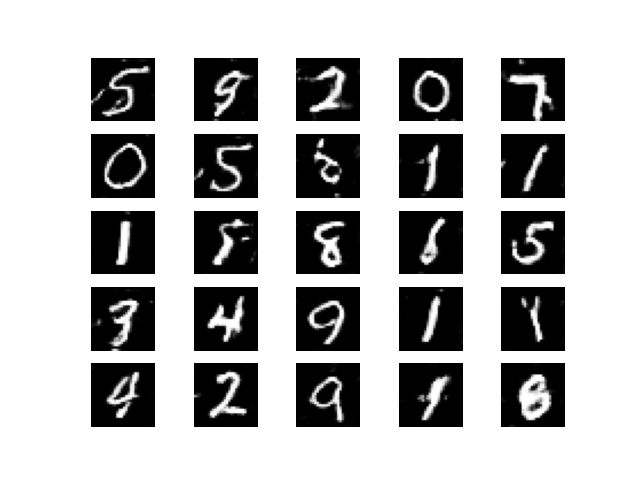

In [5]:
from PIL import Image


son_epoch = Image.open("images/9950.png") 

son_epoch